In [2]:
import pandas as pd
import geopandas as gpd

In [3]:
df = pd.read_csv('data/BH/R13296587_SL140.csv')

In [4]:
# load Data file 

In [5]:
df.shape

(24, 88)

In [6]:
df.head

<bound method NDFrame.head of       Geo_FIPS           Geo_GEOID              Geo_NAME  \
0   6037203100  14000US06037203100     Census Tract 2031   
1   6037203200  14000US06037203200     Census Tract 2032   
2   6037203300  14000US06037203300     Census Tract 2033   
3   6037203500  14000US06037203500     Census Tract 2035   
4   6037203710  14000US06037203710  Census Tract 2037.10   
5   6037203720  14000US06037203720  Census Tract 2037.20   
6   6037203800  14000US06037203800     Census Tract 2038   
7   6037203900  14000US06037203900     Census Tract 2039   
8   6037204110  14000US06037204110  Census Tract 2041.10   
9   6037204120  14000US06037204120  Census Tract 2041.20   
10  6037204200  14000US06037204200     Census Tract 2042   
11  6037204300  14000US06037204300     Census Tract 2043   
12  6037204410  14000US06037204410  Census Tract 2044.10   
13  6037204420  14000US06037204420  Census Tract 2044.20   
14  6037204600  14000US06037204600     Census Tract 2046   
15  603720

In [7]:
df.sample()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,...,PCT_SE_A14001_008,PCT_SE_A14001_009,PCT_SE_A14001_010,PCT_SE_A14001_011,PCT_SE_A14001_012,PCT_SE_A14001_013,PCT_SE_A14001_014,PCT_SE_A14001_015,PCT_SE_A14001_016,PCT_SE_A14001_017
22,6037206020,14000US06037206020,Census Tract 2060.20,"Census Tract 2060.20, Los Angeles County, Cali...",ca,140,0,ACSSF,4402,NaN,...,0.0,3.37,3.03,4.38,15.82,13.8,22.22,11.45,16.5,1.68


In [8]:
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 88 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           24 non-null     int64  
 1   Geo_GEOID          24 non-null     object 
 2   Geo_NAME           24 non-null     object 
 3   Geo_QName          24 non-null     object 
 4   Geo_STUSAB         24 non-null     object 
 5   Geo_SUMLEV         24 non-null     int64  
 6   Geo_GEOCOMP        24 non-null     int64  
 7   Geo_FILEID         24 non-null     object 
 8   Geo_LOGRECNO       24 non-null     int64  
 9   Geo_US             0 non-null      float64
 10  Geo_REGION         0 non-null      float64
 11  Geo_DIVISION       0 non-null      float64
 12  Geo_STATECE        0 non-null      float64
 13  Geo_STATE          24 non-null     int64  
 14  Geo_COUNTY         24 non-null     int64  
 15  Geo_COUSUB         0 non-null      float64
 16  Geo_PLACE          0 non-nul

In [9]:
df.Geo_FIPS.head()

0    6037203100
1    6037203200
2    6037203300
3    6037203500
4    6037203710
Name: Geo_FIPS, dtype: int64

In [10]:
df.Geo_STATE.head()

0    6
1    6
2    6
3    6
4    6
Name: Geo_STATE, dtype: int64

In [11]:
df.Geo_COUNTY.head()

0    37
1    37
2    37
3    37
4    37
Name: Geo_COUNTY, dtype: int64

In [12]:
# Have to conver the FIPS code into strings
df = pd.read_csv(
    'data/BH/R13296587_SL140.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

In [13]:
df.Geo_FIPS.head()

0    06037203100
1    06037203200
2    06037203300
3    06037203500
4    06037203710
Name: Geo_FIPS, dtype: object

In [14]:
df.columns[df.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_PLACESE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_UACP',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PUMA5',
 'Geo_PUMA1']

In [15]:
df=df.dropna(axis=1,how="all")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           24 non-null     object 
 1   Geo_GEOID          24 non-null     object 
 2   Geo_NAME           24 non-null     object 
 3   Geo_QName          24 non-null     object 
 4   Geo_STUSAB         24 non-null     object 
 5   Geo_SUMLEV         24 non-null     int64  
 6   Geo_GEOCOMP        24 non-null     int64  
 7   Geo_FILEID         24 non-null     object 
 8   Geo_LOGRECNO       24 non-null     int64  
 9   Geo_STATE          24 non-null     object 
 10  Geo_COUNTY         24 non-null     object 
 11  Geo_TRACT          24 non-null     int64  
 12  SE_A14001_001      24 non-null     int64  
 13  SE_A14001_002      24 non-null     int64  
 14  SE_A14001_003      24 non-null     int64  
 15  SE_A14001_004      24 non-null     int64  
 16  SE_A14001_005      24 non-nu

In [17]:
df.columns 

Index(['Geo_FIPS', 'Geo_GEOID', 'Geo_NAME', 'Geo_QName', 'Geo_STUSAB',
       'Geo_SUMLEV', 'Geo_GEOCOMP', 'Geo_FILEID', 'Geo_LOGRECNO', 'Geo_STATE',
       'Geo_COUNTY', 'Geo_TRACT', 'SE_A14001_001', 'SE_A14001_002',
       'SE_A14001_003', 'SE_A14001_004', 'SE_A14001_005', 'SE_A14001_006',
       'SE_A14001_007', 'SE_A14001_008', 'SE_A14001_009', 'SE_A14001_010',
       'SE_A14001_011', 'SE_A14001_012', 'SE_A14001_013', 'SE_A14001_014',
       'SE_A14001_015', 'SE_A14001_016', 'SE_A14001_017', 'PCT_SE_A14001_002',
       'PCT_SE_A14001_003', 'PCT_SE_A14001_004', 'PCT_SE_A14001_005',
       'PCT_SE_A14001_006', 'PCT_SE_A14001_007', 'PCT_SE_A14001_008',
       'PCT_SE_A14001_009', 'PCT_SE_A14001_010', 'PCT_SE_A14001_011',
       'PCT_SE_A14001_012', 'PCT_SE_A14001_013', 'PCT_SE_A14001_014',
       'PCT_SE_A14001_015', 'PCT_SE_A14001_016', 'PCT_SE_A14001_017'],
      dtype='object')

In [18]:
# Define columns to keep
columns_to_keep = ['Geo_FIPS',
                   'SE_A14001_002',
                   'SE_A14001_003',
                   'SE_A14001_004',
                   'SE_A14001_005',
                   'SE_A14001_006',
                   'SE_A14001_007',
                   'SE_A14001_008',
                   'SE_A14001_009',
                   'SE_A14001_010',
                   'SE_A14001_011',
                   'SE_A14001_012',
                   'SE_A14001_013',
                   'SE_A14001_014',
                   'SE_A14001_015',
                   'SE_A14001_016',
                   'SE_A14001_017',
                  ]

In [19]:
df2 = df[columns_to_keep]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Geo_FIPS       24 non-null     object
 1   SE_A14001_002  24 non-null     int64 
 2   SE_A14001_003  24 non-null     int64 
 3   SE_A14001_004  24 non-null     int64 
 4   SE_A14001_005  24 non-null     int64 
 5   SE_A14001_006  24 non-null     int64 
 6   SE_A14001_007  24 non-null     int64 
 7   SE_A14001_008  24 non-null     int64 
 8   SE_A14001_009  24 non-null     int64 
 9   SE_A14001_010  24 non-null     int64 
 10  SE_A14001_011  24 non-null     int64 
 11  SE_A14001_012  24 non-null     int64 
 12  SE_A14001_013  24 non-null     int64 
 13  SE_A14001_014  24 non-null     int64 
 14  SE_A14001_015  24 non-null     int64 
 15  SE_A14001_016  24 non-null     int64 
 16  SE_A14001_017  24 non-null     int64 
dtypes: int64(16), object(1)
memory usage: 3.3+ KB


In [20]:
# Rename the columns 
columns = list(df2)
columns

['Geo_FIPS',
 'SE_A14001_002',
 'SE_A14001_003',
 'SE_A14001_004',
 'SE_A14001_005',
 'SE_A14001_006',
 'SE_A14001_007',
 'SE_A14001_008',
 'SE_A14001_009',
 'SE_A14001_010',
 'SE_A14001_011',
 'SE_A14001_012',
 'SE_A14001_013',
 'SE_A14001_014',
 'SE_A14001_015',
 'SE_A14001_016',
 'SE_A14001_017']

In [21]:
df2.columns = ['FIPS',               
'Less than $10,000',
'$10,000-$14,999',
'$15,000-$19,999',
'$20,000-$24,999',
'$25,000-$29,999',
'$30,000-$34,999',
'$35,000-$39,999',
'$40,000-$44,999',
'$45,000-$49,999',
'$50,000-$59,999',
'$60,000-$74,999',
'$75,000-$99,999',
'$100,000-$124,999',
'$125,000-$149,999',
'$150,000-$199,999',
'More than $200,000']

In [22]:
# Making sure the data works 
df2.head(10)

,FIPS,"Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999","More than $200,000"
0,06037203100,156,141,96,44,101,107,85,33,38,93,96,126,55,34,21,13
1,06037203200,76,66,75,89,62,31,75,45,54,110,140,192,98,33,114,61
2,06037203300,23,72,10,18,19,40,21,59,13,28,34,15,38,7,8,0
3,06037203500,98,109,34,25,103,67,6,52,91,72,75,70,54,16,34,30
4,06037203710,55,2,32,55,30,35,121,43,36,86,91,132,56,0,0,25
5,06037203720,50,53,81,76,92,97,88,50,49,53,105,152,70,20,8,10
6,06037203800,51,125,51,158,0,15,40,128,128,18,80,183,119,0,11,36
7,06037203900,31,30,25,53,28,51,9,58,20,59,57,105,42,87,28,35
8,06037204110,6,130,6,37,81,30,34,47,7,71,181,76,43,16,22,14
9,06037204120,52,37,30,6,42,61,43,68,27,65,100,116,64,13,23,6


In [23]:
# Doing some stats 
df2.mean()

FIPS                  2.515501e+261
Less than $10,000      6.216667e+01
$10,000-$14,999        8.637500e+01
$15,000-$19,999        5.491667e+01
$20,000-$24,999        6.054167e+01
$25,000-$29,999        6.450000e+01
$30,000-$34,999        5.029167e+01
$35,000-$39,999        4.837500e+01
$40,000-$44,999        5.020833e+01
$45,000-$49,999        4.433333e+01
$50,000-$59,999        6.954167e+01
$60,000-$74,999        8.512500e+01
$75,000-$99,999        1.010833e+02
$100,000-$124,999      5.679167e+01
$125,000-$149,999      2.600000e+01
$150,000-$199,999      2.816667e+01
More than $200,000     1.945833e+01
dtype: float64

In [24]:
# access a single column like df['col_name']
df2.head()

,FIPS,"Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999","More than $200,000"
0,06037203100,156,141,96,44,101,107,85,33,38,93,96,126,55,34,21,13
1,06037203200,76,66,75,89,62,31,75,45,54,110,140,192,98,33,114,61
2,06037203300,23,72,10,18,19,40,21,59,13,28,34,15,38,7,8,0
3,06037203500,98,109,34,25,103,67,6,52,91,72,75,70,54,16,34,30
4,06037203710,55,2,32,55,30,35,121,43,36,86,91,132,56,0,0,25


In [25]:
df2['Less than $10,000'].mean()

62.166666666666664

In [26]:
df2.median()

FIPS                  6.037204e+09
Less than $10,000     6.200000e+01
$10,000-$14,999       8.950000e+01
$15,000-$19,999       5.300000e+01
$20,000-$24,999       5.750000e+01
$25,000-$29,999       6.150000e+01
$30,000-$34,999       4.800000e+01
$35,000-$39,999       4.300000e+01
$40,000-$44,999       5.050000e+01
$45,000-$49,999       3.900000e+01
$50,000-$59,999       6.800000e+01
$60,000-$74,999       7.750000e+01
$75,000-$99,999       9.150000e+01
$100,000-$124,999     5.450000e+01
$125,000-$149,999     1.800000e+01
$150,000-$199,999     2.200000e+01
More than $200,000    1.650000e+01
dtype: float64

In [27]:
df2.describe()

,"Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999","More than $200,000"
count,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,62.166667,86.375000,54.916667,60.541667,64.50000,50.291667,48.375000,50.208333,44.333333,69.541667,85.125000,101.083333,56.791667,26.000000,28.166667,19.458333
std,40.782207,49.091585,37.973580,35.986687,40.79109,27.210099,35.043839,25.877603,32.928997,39.925996,41.198683,48.010793,24.348876,23.636744,28.484422,16.738342
min,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,0.000000,10.000000,7.000000,13.000000,34.000000,15.000000,13.000000,0.000000,0.000000,0.000000
25%,29.000000,49.500000,26.500000,37.000000,33.00000,32.500000,26.250000,37.750000,18.750000,43.500000,54.750000,70.750000,42.750000,11.750000,11.750000,5.750000
50%,62.000000,89.500000,53.000000,57.500000,61.50000,48.000000,43.000000,50.500000,39.000000,68.000000,77.500000,91.500000,54.500000,18.000000,22.000000,16.500000
75%,95.750000,126.250000,76.500000,89.250000,94.25000,62.500000,60.000000,58.250000,55.750000,90.750000,101.250000,132.250000,65.250000,34.000000,30.000000,30.000000
max,156.000000,188.000000,144.000000,158.000000,151.00000,107.000000,121.000000,128.000000,128.000000,159.000000,181.000000,192.000000,119.000000,87.000000,114.000000,61.000000


<AxesSubplot: title={'center': 'Boyle Heights'}>

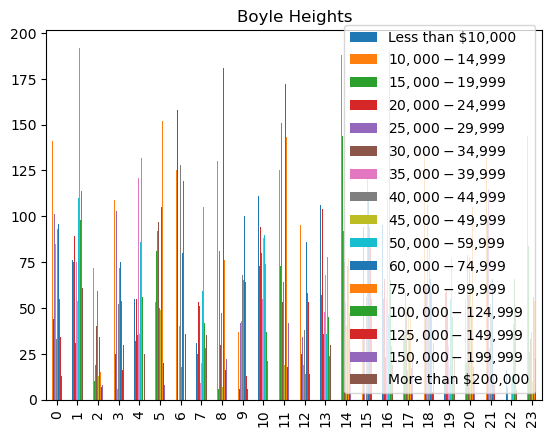

In [28]:
df2.plot.bar(title = "Boyle Heights")

In [ ]:
# This data looks way to much information need to condense the values 

In [29]:
# Want to create a total households population
df3 = ['Less than $10,000',
'$10,000-$14,999',
'$15,000-$19,999',
'$20,000-$24,999',
'$25,000-$29,999',
'$30,000-$34,999',
'$35,000-$39,999',
'$40,000-$44,999',
'$45,000-$49,999',
'$50,000-$59,999',
'$60,000-$74,999',
'$75,000-$99,999',
'$100,000-$124,999',
'$125,000-$149,999',
'$150,000-$199,999',
'More than $200,000']

In [30]:
df2['TotalPop'] = df2[df3].sum(axis = 1)
df2.head(3)

/tmp/ipykernel_64/337586398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TotalPop'] = df2[df3].sum(axis = 1)


,FIPS,"Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999","More than $200,000",TotalPop
0,06037203100,156,141,96,44,101,107,85,33,38,93,96,126,55,34,21,13,1239
1,06037203200,76,66,75,89,62,31,75,45,54,110,140,192,98,33,114,61,1321
2,06037203300,23,72,10,18,19,40,21,59,13,28,34,15,38,7,8,0,405


In [31]:
# Notice that the SE_A14001_001 is household number of resondents by census tract
df3 = pd.read_csv("data/BH/R13296587_SL140.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df3.head(5)

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATECE,Geo_STATE,Geo_COUNTY,Geo_COUSUB,Geo_PLACE,Geo_PLACESE,Geo_TRACT,Geo_BLKGRP,Geo_CONCIT,Geo_AIANHH,Geo_AIANHHFP,Geo_AIHHTLI,Geo_AITSCE,Geo_AITS,Geo_ANRC,Geo_CBSA,Geo_CSA,Geo_METDIV,Geo_MACC,Geo_MEMI,Geo_NECTA,Geo_CNECTA,Geo_NECTADIV,Geo_UA,Geo_UACP,Geo_CDCURR,Geo_SLDU,Geo_SLDL,Geo_VTD,Geo_ZCTA3,Geo_ZCTA5,Geo_SUBMCD,Geo_SDELM,Geo_SDSEC,Geo_SDUNI,Geo_UR,Geo_PCI,Geo_TAZ,Geo_UGA,Geo_BTTR,Geo_BTBG,Geo_PUMA5,Geo_PUMA1,SE_A14001_001,SE_A14001_002,SE_A14001_003,SE_A14001_004,SE_A14001_005,SE_A14001_006,SE_A14001_007,SE_A14001_008,SE_A14001_009,SE_A14001_010,SE_A14001_011,SE_A14001_012,SE_A14001_013,SE_A14001_014,SE_A14001_015,SE_A14001_016,SE_A14001_017,PCT_SE_A14001_002,PCT_SE_A14001_003,PCT_SE_A14001_004,PCT_SE_A14001_005,PCT_SE_A14001_006,PCT_SE_A14001_007,PCT_SE_A14001_008,PCT_SE_A14001_009,PCT_SE_A14001_010,PCT_SE_A14001_011,PCT_SE_A14001_012,PCT_SE_A14001_013,PCT_SE_A14001_014,PCT_SE_A14001_015,PCT_SE_A14001_016,PCT_SE_A14001_017
0,6037203100,14000US06037203100,Census Tract 2031,"Census Tract 2031, Los Angeles County, California",ca,140,0,ACSSF,4378,NaN,NaN,NaN,NaN,6,37,NaN,NaN,NaN,203100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1239,156,141,96,44,101,107,85,33,38,93,96,126,55,34,21,13,12.59,11.38,7.75,3.55,8.15,8.64,6.86,2.66,3.07,7.51,7.75,10.17,4.44,2.74,1.69,1.05
1,6037203200,14000US06037203200,Census Tract 2032,"Census Tract 2032, Los Angeles County, California",ca,140,0,ACSSF,4379,NaN,NaN,NaN,NaN,6,37,NaN,NaN,NaN,203200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1321,76,66,75,89,62,31,75,45,54,110,140,192,98,33,114,61,5.75,5.00,5.68,6.74,4.69,2.35,5.68,3.41,4.09,8.33,10.60,14.53,7.42,2.50,8.63,4.62
2,6037203300,14000US06037203300,Census Tract 2033,"Census Tract 2033, Los Angeles County, California",ca,140,0,ACSSF,4380,NaN,NaN,NaN,NaN,6,37,NaN,NaN,NaN,203300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,405,23,72,10,18,19,40,21,59,13,28,34,15,38,7,8,0,5.68,17.78,2.47,4.44,4.69,9.88,5.19,14.57,3.21,6.91,8.40,3.70,9.38,1.73,1.98,0.00
3,6037203500,14000US06037203500,Census Tract 2035,"Census Tract 2035, Los Angeles County, California",ca,140,0,ACSSF,4381,NaN,NaN,NaN,NaN,6,37,NaN,NaN,NaN,203500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,936,98,109,34,25,103,67,6,52,91,72,75,70,54,16,34,30,10.47,11.65,3.63,2.67,11.00,7.16,0.64,5.56,9.72,7.69,8.01,7.48,5.77,1.71,3.63,3.21
4,6037203710,14000US06037203710,Census Tract 2037.10,"Census Tract 2037.10, Los Angeles County, Cali...",ca,140,0,ACSSF,4383,NaN,NaN,NaN,NaN,6,37,NaN,NaN,NaN,203710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,799,55,2,32,55,30,35,121,43,36,86,91,132,56,0,0,25,6.88,0.25,4.01,6.88,3.75,4.38,15.14,5.38,4.51,10.76,11.39,16.52,7.01,0.00,0.00,3.13


In [32]:
df_householdsize = df3['SE_A14001_001']
df_householdsize.sample(10)

16    1245
22     297
8      801
5     1054
21     977
17     512
11    1302
2      405
14    1208
10     962
Name: SE_A14001_001, dtype: int64

In [33]:
df_householdsize.describe()

count      24.00000
mean      907.87500
std       285.09393
min       297.00000
25%       744.25000
50%       940.00000
75%      1159.25000
max      1321.00000
Name: SE_A14001_001, dtype: float64

In [34]:
# Creating a poverty column variable 
df2['poverty'] = df2['Less than $10,000'] + df2['$10,000-$14,999'] + df2['$15,000-$19,999'] + df2['$20,000-$24,999'] 
df2.sample(5)

/tmp/ipykernel_64/3305094393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['poverty'] = df2['Less than $10,000'] + df2['$10,000-$14,999'] + df2['$15,000-$19,999'] + df2['$20,000-$24,999']


,FIPS,"Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999","More than $200,000",TotalPop,poverty
21,06037205120,88,132,141,98,115,57,28,52,46,47,66,71,13,8,15,0,977,459
10,06037204200,111,109,73,94,37,80,55,22,88,90,37,74,37,34,21,0,962,387
6,06037203800,51,125,51,158,0,15,40,128,128,18,80,183,119,0,11,36,1143,385
22,06037206020,16,0,7,0,0,0,0,10,9,13,47,41,66,34,49,5,297,23
23,06037206050,102,144,84,90,26,33,44,37,10,73,56,54,30,22,0,0,805,420


In [35]:
#Creating a poverty and total population to get a percent 
df2['p_poverty'] = df2['poverty']/df2['TotalPop']*100
df2.sample(10)

/tmp/ipykernel_64/3666134208.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['p_poverty'] = df2['poverty']/df2['TotalPop']*100


,FIPS,"Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999","More than $200,000",TotalPop,poverty,p_poverty
14,06037204600,74,188,144,66,92,75,43,53,40,133,73,77,51,47,27,25,1208,472,39.072848
12,06037204410,44,95,27,25,34,19,19,38,28,14,86,63,58,53,10,14,627,191,30.462520
1,06037203200,76,66,75,89,62,31,75,45,54,110,140,192,98,33,114,61,1321,306,23.164269
15,06037204700,103,39,83,94,36,100,0,56,42,126,111,133,94,85,110,55,1267,319,25.177585
13,06037204420,106,84,57,104,129,36,48,11,68,36,88,78,45,0,24,30,944,351,37.182203
20,06037205110,5,55,20,51,79,57,49,77,61,119,51,105,91,18,12,7,857,131,15.285881
7,06037203900,31,30,25,53,28,51,9,58,20,59,57,105,42,87,28,35,718,139,19.359331
22,06037206020,16,0,7,0,0,0,0,10,9,13,47,41,66,34,49,5,297,23,7.744108
16,06037204810,95,100,55,66,107,23,55,95,110,46,147,190,65,43,29,19,1245,316,25.381526
8,06037204110,6,130,6,37,81,30,34,47,7,71,181,76,43,16,22,14,801,179,22.347066


<AxesSubplot: ylabel='Frequency'>

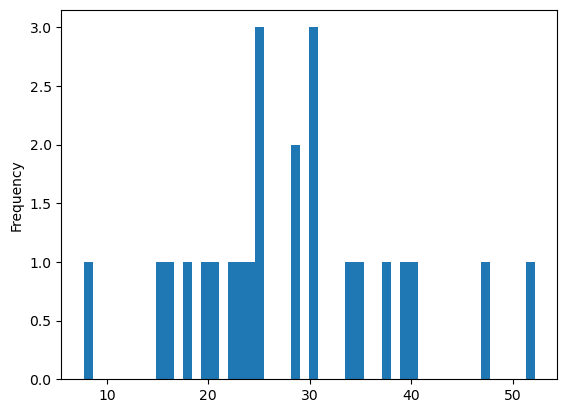

In [36]:
df2['p_poverty'].plot.hist(bins=50)

In [37]:
# top 10 census of households income that live in poverty. 
df_sorted = df2.sort_values(by='p_poverty',ascending = False)
df_sorted[['FIPS','p_poverty']].head(10)

,FIPS,p_poverty
23,06037206050,52.173913
21,06037205120,46.980553
10,06037204200,40.228690
14,06037204600,39.072848
13,06037204420,37.182203
0,06037203100,35.270379
6,06037203800,33.683290
12,06037204410,30.462520
18,06037204910,30.402542
2,06037203300,30.370370


<AxesSubplot: xlabel='FIPS'>

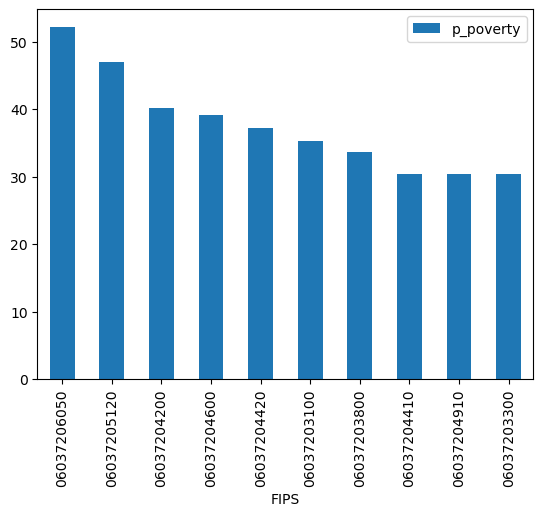

In [38]:
df_sorted.head(10).plot.bar(x='FIPS',
                            y='p_poverty')

<AxesSubplot: title={'center': 'Census Tract where Boyle Heights has more poverty'}, ylabel='FIPS'>

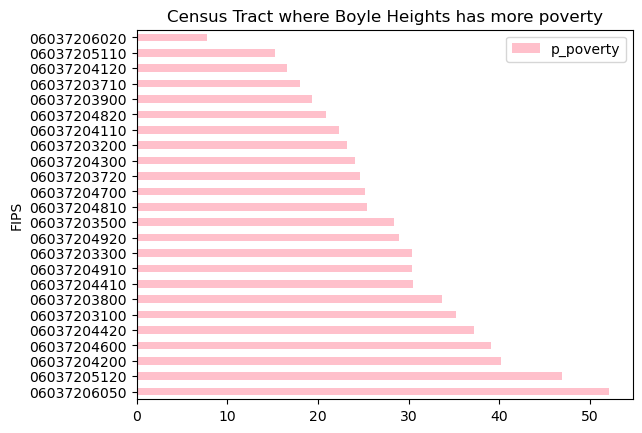

In [39]:
df_sorted.head(30).plot.barh(x='FIPS',  # barh turns the plot direction 
                            y='p_poverty', 
                            title='Census Tract where Boyle Heights has more poverty',
                            color='Pink')

In [45]:
# Import geojson file of LA County
tracts=gpd.read_file('data/BH/Census_Tracts_2020.geojson')
tracts.head(2)

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."


In [41]:
tracts['FIPS'] ='06' + '037' + tracts['CT20']

In [42]:
tracts=tracts.merge(df2, on="FIPS")

In [43]:
tracts.head(3)

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry,FIPS,"Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999","More than $200,000",TotalPop,poverty,p_poverty
0,556,203100,2031.00,7.076574e+06,11835.711463,"POLYGON ((-118.19258 34.05557, -118.19259 34.0...",06037203100,156,141,96,44,101,107,85,33,38,93,96,126,55,34,21,13,1239,437,35.270379
1,557,203200,2032.00,5.553915e+06,10214.890263,"POLYGON ((-118.19252 34.04851, -118.19253 34.0...",06037203200,76,66,75,89,62,31,75,45,54,110,140,192,98,33,114,61,1321,306,23.164269
2,558,203300,2033.00,1.605805e+07,15611.025193,"POLYGON ((-118.20589 34.05354, -118.20559 34.0...",06037203300,23,72,10,18,19,40,21,59,13,28,34,15,38,7,8,0,405,123,30.370370


<AxesSubplot: >

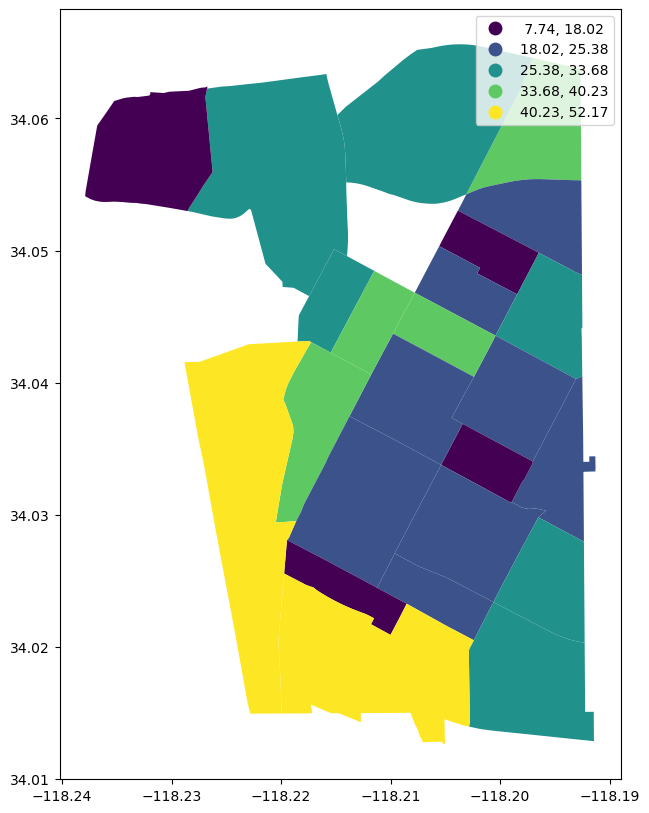

In [44]:
# scheme='NaturalBreaks'
tracts.plot(figsize=(12,10),
                 column='p_poverty',
                 legend=True, 
                 scheme='NaturalBreaks')